In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy import stats 
import warnings 
warnings.filterwarnings("ignore")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
#path to uber csv 

file="uber.csv"

#read into data
uber_df= pd.read_csv(file)


uber_df=uber_df.sample(50)


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

pickup_lats=uber_df["pickup_latitude"]
pickup_lngs=uber_df["pickup_longitude"]
#lat_lngs=zip(pickup_lats,pickup_lngs)

uber_df["City"]="x"

for index, row in uber_df.iterrows():
    city=citipy.nearest_city(row["pickup_latitude"],row["pickup_longitude"]).city_name
    uber_df.loc[index,"City"]=city  
       
# Print the city count to confirm sufficient count
len(cities)
uber_df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City
61332,28864953,2013-05-23 17:21:00.000000131,12.00,2013-05-23 17:21:00 UTC,-73.967680,40.762665,-73.992487,40.742867,1,guttenberg
96154,26029088,2015-03-20 15:39:31.0000005,17.50,2015-03-20 15:39:31 UTC,-73.942474,40.751007,-73.938972,40.801731,1,new york
10968,7563618,2015-01-17 15:05:35.0000008,5.50,2015-01-17 15:05:35 UTC,-73.990585,40.734936,-73.998161,40.729328,5,new york
50413,7953647,2012-02-19 21:27:00.00000077,4.90,2012-02-19 21:27:00 UTC,-73.951598,40.714208,-73.957473,40.722232,1,new york
169919,2710565,2012-01-04 09:12:29.0000002,11.30,2012-01-04 09:12:29 UTC,-73.946756,40.772440,-73.984445,40.733046,1,guttenberg
121319,4511714,2013-11-07 17:41:00.00000038,8.00,2013-11-07 17:41:00 UTC,-73.978865,40.782282,-73.966972,40.807457,3,guttenberg
154828,38945628,2012-06-26 15:25:19.0000003,28.10,2012-06-26 15:25:19 UTC,-73.874655,40.774121,-73.993431,40.752522,1,edgewater
12997,41149659,2010-12-02 08:34:00.000000198,9.30,2010-12-02 08:34:00 UTC,-73.957582,40.761735,-73.982908,40.750763,1,guttenberg
58281,2233862,2010-08-08 18:48:10.0000001,6.10,2010-08-08 18:48:10 UTC,-73.995671,40.759404,-74.008521,40.745558,1,weehawken
195920,28001961,2012-02-23 11:39:00.000000137,6.10,2012-02-23 11:39:00 UTC,-74.008910,40.756742,-73.982110,40.736312,6,weehawken


In [4]:
# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


In [5]:
#distance 

dropoff_lats=uber_df["pickup_longitude"]
dropoff_lngs=uber_df["pickup_longitude"]

uber_df["Distance"]=0

for index, row in uber_df.iterrows():
    distance=haversine(row["pickup_latitude"],row["pickup_longitude"],\
                       row["dropoff_latitude"], row["dropoff_longitude"],to_radians=True, earth_radius=6371)
    uber_df.loc[index,"Distance"]=distance  


In [6]:
#binning 

#set time of day bins
timeofday=[0, 5, 12, 17, 24]

uber_df.pickup_datetime= pd.to_datetime(uber_df.pickup_datetime)

#labels for bins
times=["Night","Morning","Afternoon","Evening"]

uber_df['Time of Day'] = pd.cut(uber_df.pickup_datetime.dt.hour, timeofday, labels=times, right=False)


In [7]:
#remove distance 0

uber_df_cleaned=uber_df.loc[uber_df["Distance"]!=0]

uber_df_cleaned

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,City,Distance,Time of Day
61332,28864953,2013-05-23 17:21:00.000000131,12.00,2013-05-23 17:21:00+00:00,-73.967680,40.762665,-73.992487,40.742867,1,guttenberg,3.035245,Evening
96154,26029088,2015-03-20 15:39:31.0000005,17.50,2015-03-20 15:39:31+00:00,-73.942474,40.751007,-73.938972,40.801731,1,new york,5.647957,Afternoon
10968,7563618,2015-01-17 15:05:35.0000008,5.50,2015-01-17 15:05:35+00:00,-73.990585,40.734936,-73.998161,40.729328,5,new york,0.892353,Afternoon
50413,7953647,2012-02-19 21:27:00.00000077,4.90,2012-02-19 21:27:00+00:00,-73.951598,40.714208,-73.957473,40.722232,1,new york,1.020405,Evening
169919,2710565,2012-01-04 09:12:29.0000002,11.30,2012-01-04 09:12:29+00:00,-73.946756,40.772440,-73.984445,40.733046,1,guttenberg,5.409869,Morning
121319,4511714,2013-11-07 17:41:00.00000038,8.00,2013-11-07 17:41:00+00:00,-73.978865,40.782282,-73.966972,40.807457,3,guttenberg,2.972975,Evening
154828,38945628,2012-06-26 15:25:19.0000003,28.10,2012-06-26 15:25:19+00:00,-73.874655,40.774121,-73.993431,40.752522,1,edgewater,10.287645,Afternoon
12997,41149659,2010-12-02 08:34:00.000000198,9.30,2010-12-02 08:34:00+00:00,-73.957582,40.761735,-73.982908,40.750763,1,guttenberg,2.457437,Morning
58281,2233862,2010-08-08 18:48:10.0000001,6.10,2010-08-08 18:48:10+00:00,-73.995671,40.759404,-74.008521,40.745558,1,weehawken,1.882019,Evening
195920,28001961,2012-02-23 11:39:00.000000137,6.10,2012-02-23 11:39:00+00:00,-74.008910,40.756742,-73.982110,40.736312,6,weehawken,3.202779,Morning


## Adding in Zipcodes from Geopy and Income from Census data 

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

uber_df_cleaned["Zipcode"]=0



for index, row in uber_df_cleaned.iterrows():
    try: 
        location = geolocator.reverse(str(row["pickup_latitude"])+","+str(row["pickup_longitude"]))
        zipcode=list(location.raw.values())[7]["postcode"]
        uber_df_cleaned.loc[index,"Zipcode"]=zipcode
    
    except:
        print(str(row["pickup_latitude"])+","+str(row["pickup_longitude"])+" zipcode not found, passing... ")
        pass


0.0,0.0 zipcode not found, passing... 


In [9]:
#where zipcodes were not found, leave behind 
zipcodez=uber_df_cleaned.loc[uber_df_cleaned["Zipcode"]!=0]

In [10]:
#average year of date times 

year=round(uber_df_cleaned.pickup_datetime.dt.year.mean(),0)
year

2012.0

In [11]:
from census import Census

# Census API Key
from api_key import c_key
c = Census(c_key, year=year)

census_data = c.acs5.get(("NAME", "B19013_001E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Household Income",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd

,Name,Household Income,state,Zipcode
0,ZCTA5 02655,73323,25,02655
1,ZCTA5 02657,46031,25,02657
2,ZCTA5 02659,51466,25,02659
3,ZCTA5 02660,48617,25,02660
4,ZCTA5 02663,21667,25,02663
...,...,...,...,...
33115,ZCTA5 97035,72883,41,97035
33116,ZCTA5 97037,41048,41,97037
33117,ZCTA5 97038,54225,41,97038
33118,ZCTA5 97039,33056,41,97039


In [13]:
zipcoded=pd.merge(zipcodez,census_pd,how="left",on="Zipcode").dropna()
zipcoded=zipcoded.loc[(zipcoded["Household Income"].astype(float))>0]

In [14]:
#count number of rides per zipcode 
byincome=zipcoded.groupby("Household Income")["fare_amount"].sum()


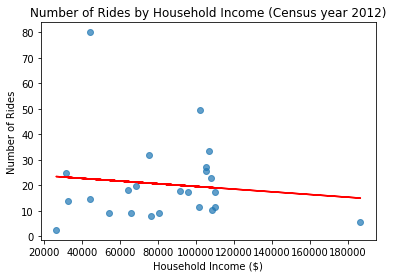

In [30]:
# Create a Scatter Plot for income and number of rides 
x_values = zipcoded["Household Income"].unique().astype(float)
y_values = byincome



slope,inte,r,p,std_err=stats.linregress(x_values,y_values)
fitline=slope*x_values + inte

plt.scatter(x_values,y_values,alpha=.7)
plt.plot(x_values,fitline,"r-")
plt.xlabel('Household Income ($)')
plt.ylabel(f'Number of Rides')

plt.title(f'Number of Rides by Household Income (Census year 2012)')

plt.show()

In [31]:
# Most Popular Pick up times & how it correlates to price (plot, basic stats dataframe) -Neil 

# Price regression on number of passengers (plot, stats)- Neil 

# Rank by cities (fare amount paid, Total distances, Most popular time of day) -Rebecca

# Where are the most popular pick up locations (map, dataframe) -Turgut 

# Where are the most popular drop off locations (map, dataframe) -Turgut

# Distance between pick up and drop off vs Price (basic stats, plot) -Daniel 

### By City: Fare Amount Paid, Most popular Time of Day, Total Distances 

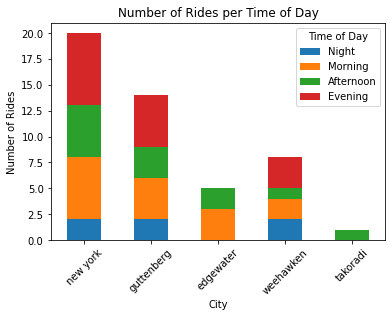

<Figure size 432x288 with 0 Axes>

In [32]:
bycities=uber_df_cleaned.groupby(["City","Time of Day"]).size().head(20).sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)

# Set a title for the chart
plt.title("Number of Rides per Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

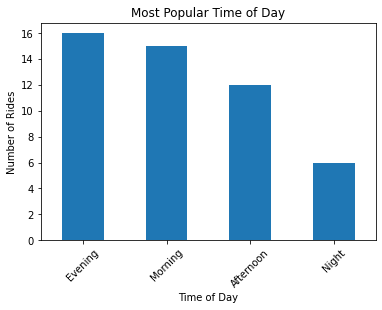

<Figure size 432x288 with 0 Axes>

In [33]:
bycities=uber_df_cleaned.groupby(["Time of Day"]).size().sort_values(ascending=False).plot(kind='bar')

# Set a title for the chart
plt.title("Most Popular Time of Day")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

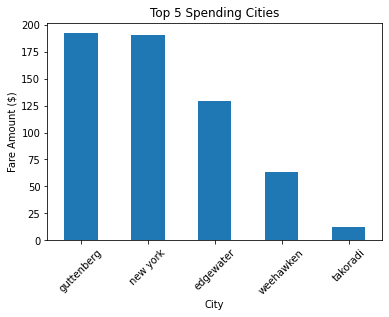

<Figure size 432x288 with 0 Axes>

In [34]:
bycities=uber_df_cleaned.groupby("City")["fare_amount"].sum().head(5).sort_values(ascending=False).plot(kind='bar')

# Set a title for the chart
plt.title("Top 5 Spending Cities")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

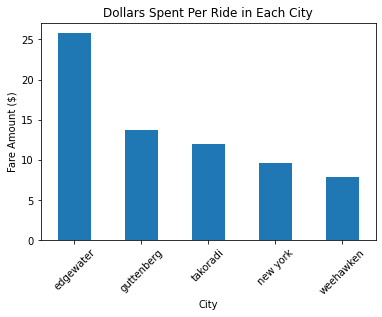

<Figure size 432x288 with 0 Axes>

In [35]:
bycities=uber_df_cleaned.groupby("City")["fare_amount"].sum()
ridespercity=uber_df_cleaned.groupby("City")["Distance"].count()

percityspent=bycities/ridespercity
percityspent.head(5).sort_values(ascending=False).plot(kind="bar")

# Set a title for the chart
plt.title("Dollars Spent Per Ride in Each City")
plt.ylabel("Fare Amount ($)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

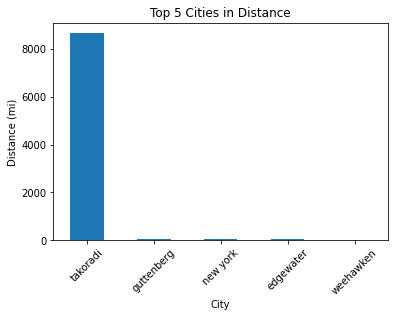

<Figure size 432x288 with 0 Axes>

In [36]:
bycities=uber_df_cleaned.groupby("City")["Distance"].sum().head(5).sort_values(ascending=False).plot(kind='bar')

# Set a title for the chart
plt.title("Top 5 Cities in Distance")
plt.ylabel("Distance (mi)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

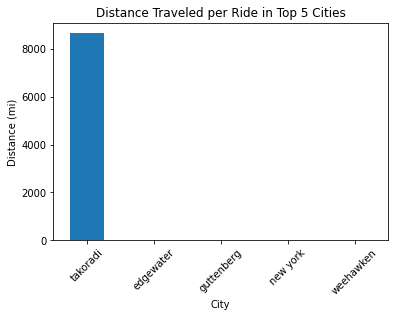

<Figure size 432x288 with 0 Axes>

In [37]:
bycities=uber_df_cleaned.groupby("City")["Distance"].sum()
percityspent=bycities/ridespercity
percityspent.head(5).sort_values(ascending=False).plot(kind="bar")
# Set a title for the chart
plt.title("Distance Traveled per Ride in Top 5 Cities")
plt.ylabel("Distance (mi)")
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()